## Task 7
## Author: Anurag Kumar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor

In [66]:
df = pd.read_csv(r"C:\Users\ARUN KUMAR\Downloads\BSESN.xls")

In [3]:
df.head()

,Date,Open,High,Low,Close
0,01-Jan-01,3990.65,4021.83,3937.33,3955.08
1,02-Jan-01,3953.22,4028.57,3929.37,4018.88
2,03-Jan-01,3977.58,4067.66,3977.58,4060.02
3,04-Jan-01,4180.97,4180.97,4109.55,4115.37
4,05-Jan-01,4116.34,4195.01,4115.35,4183.73


In [4]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [75]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4976 entries, 0 to 4975
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4976 non-null   datetime64[ns]
 1   Open    4976 non-null   float64       
 2   High    4976 non-null   float64       
 3   Low     4976 non-null   float64       
 4   Close   4976 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 194.5 KB


In [6]:
df.set_index('Date', inplace = True)


In [7]:
df.isna().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [8]:
df.head()

,Open,High,Low,Close
Date,,,,
2001-01-01,3990.65,4021.83,3937.33,3955.08
2001-01-02,3953.22,4028.57,3929.37,4018.88
2001-01-03,3977.58,4067.66,3977.58,4060.02
2001-01-04,4180.97,4180.97,4109.55,4115.37
2001-01-05,4116.34,4195.01,4115.35,4183.73


In [9]:
df.shape

(4976, 4)

In [10]:
df_1 = pd.read_csv(r"C:\Users\ARUN KUMAR\Downloads\india-news-headlines.csv")

In [11]:
df_1["publish_date"] = pd.to_datetime(df_1["publish_date"],format='%Y%m%d')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ MB


In [12]:
df_1.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
df_1["headline_text"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1                  Fissures in Hurriyat over Pak visit
2                America's unwanted heading for India 
3                   For bigwigs  it is destination Goa
4                 Extra buses to clear tourist traffic
Name: headline_text, dtype: object

In [23]:
df_1.set_index('publish_date', inplace = True)

In [24]:
df_1.isna().sum()

headline_category    0
headline_text        0
dtype: int64

In [25]:
df_1.tail()

,headline_category,headline_text
publish_date,,
2020-12-31,city jodhpur,Covid Despite dip in cases Rajasthan amon...
2020-12-31,city udaipur,Covid Despite dip in cases Rajasthan amon...
2020-12-31,city ajmer,Covid Despite dip in cases Rajasthan amon...
2020-12-31,removed,Govt extends deadline for use of FASTag till F...
2020-12-31,entertainment bengali movies news,Celebs plan to party safely and responsibly on...


In [15]:
df.tail()

,Open,High,Low,Close
Date,,,,
2020-12-24,46743.49,47053.40,46539.02,46973.54
2020-12-28,47153.59,47406.72,47148.24,47353.75
2020-12-29,47466.62,47714.55,47361.90,47613.08
2020-12-30,47789.03,47807.85,47358.36,47746.22
2020-12-31,47753.11,47896.97,47602.12,47751.33


In [21]:
#!pip install textblob
#python -m textblob.download_corpora
#conda install -c conda-forge textblob

In [26]:
from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

df_1['Subjectivity'] = df_1['headline_text'].apply(getSubjectivity) ##Adding subjectivity score

df_1['Polarity'] = df_1['headline_text'].apply(getPolarity) ##Adding polarity scores

In [27]:
sia = SentimentIntensityAnalyzer()  ##Adding sentiment score to news
df_1['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_1['headline_text']] ##Adding sentiment score to news
df_1['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_1['headline_text']] ##Adding sentiment score to news
df_1['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_1['headline_text']] 

In [28]:
df_1.head()

,headline_category,headline_text,Subjectivity,Polarity,Negative,Neutral,Positive
publish_date,,,,,,,
2001-01-02,unknown,Status quo will not be disturbed at Ayodhya s...,0.000000,0.00,0.000,0.805,0.195
2001-01-02,unknown,Fissures in Hurriyat over Pak visit,0.000000,0.00,0.000,1.000,0.000
2001-01-02,unknown,America's unwanted heading for India,0.000000,0.00,0.322,0.678,0.000
2001-01-02,unknown,For bigwigs it is destination Goa,0.000000,0.00,0.000,1.000,0.000
2001-01-02,unknown,Extra buses to clear tourist traffic,0.241667,0.05,0.000,0.658,0.342


In [30]:
df_1.shape

(3424067, 7)

In [34]:
df_1.index.nunique()

7262

In [36]:
X = df_1.groupby('publish_date').mean()
X.head()

,Subjectivity,Polarity,Negative,Neutral,Positive
publish_date,,,,,
2001-01-02,0.071802,0.042539,0.096907,0.831698,0.071395
2001-01-03,0.063720,0.014939,0.125634,0.786122,0.088268
2001-01-04,0.149389,0.039301,0.079392,0.835366,0.085235
2001-01-05,0.277985,0.146997,0.117810,0.741897,0.140278
2001-01-06,0.271212,0.128030,0.176250,0.703000,0.120750


In [39]:
X.columns

Index(['Subjectivity', 'Polarity', 'Negative', 'Neutral', 'Positive'], dtype='object')

In [40]:
X.shape

(7262, 5)

In [41]:
X['Close']= df['Close']
X.isna().sum()

Subjectivity       0
Polarity           0
Negative           0
Neutral            0
Positive           0
Close           2316
dtype: int64

In [47]:
X.head()

,Subjectivity,Polarity,Negative,Neutral,Positive,Close
publish_date,,,,,,
2001-01-02,0.071802,0.042539,0.096907,0.831698,0.071395,4018.88
2001-01-03,0.063720,0.014939,0.125634,0.786122,0.088268,4060.02
2001-01-04,0.149389,0.039301,0.079392,0.835366,0.085235,4115.37
2001-01-05,0.277985,0.146997,0.117810,0.741897,0.140278,4183.73
2001-01-08,0.120920,0.011879,0.099197,0.818833,0.081970,4120.43


In [44]:
X.dropna(subset=['Close'],inplace=True)
X.shape

(4946, 6)

In [46]:
X_train = X.drop(['Close'],axis=1)
X_train = X_train[:3000]
X_train.tail()

,Subjectivity,Polarity,Negative,Neutral,Positive
publish_date,,,,,
2013-02-11,0.180212,0.035119,0.119206,0.798663,0.082128
2013-02-12,0.140770,0.013076,0.132391,0.797711,0.069893
2013-02-13,0.146384,0.028492,0.126848,0.796177,0.076983
2013-02-14,0.162798,0.036956,0.117452,0.788386,0.094160
2013-02-15,0.167306,0.033881,0.134283,0.788210,0.077512


In [48]:
X_test = X.drop(['Close'],axis=1)
X_test = X_test[3000:]
X_test.head()

,Subjectivity,Polarity,Negative,Neutral,Positive
publish_date,,,,,
2013-02-18,0.152007,0.022151,0.109747,0.808634,0.081624
2013-02-19,0.143963,0.021963,0.120381,0.814938,0.064681
2013-02-20,0.151154,0.022718,0.129987,0.798562,0.071456
2013-02-21,0.140210,0.013442,0.130581,0.800000,0.069411
2013-02-22,0.145000,0.014562,0.141020,0.789845,0.069140


In [50]:
Y_train= X['Close']
Y_train = Y_train[:3000]
Y_test = X['Close']
Y_test = Y_test[3000:]

In [51]:
rf = RandomForestRegressor()

In [52]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [53]:
pred = rf.predict(X_test)

In [59]:
pred = pd.DataFrame(pred,index = X_test.index,columns=['Close'])

In [60]:
mean_squared_error(Y_test,pred)

303712195.92242867

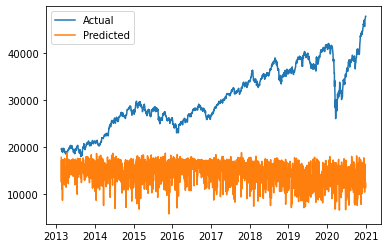

In [61]:
plt.plot(Y_test)
plt.plot(pred)
plt.legend(['Actual','Predicted'])

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [63]:
lr.fit(X_train,Y_train)

LinearRegression()

In [64]:
pred = lr.predict(X_test)
pred = pd.DataFrame(pred,index = X_test.index,columns=['Close'])

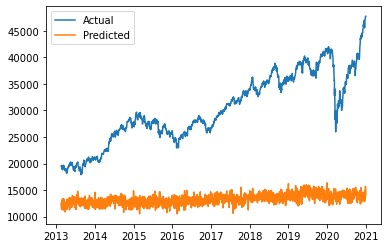

In [65]:
plt.plot(Y_test)
plt.plot(pred)
plt.legend(['Actual','Predicted'])

In [76]:
x_train = df[:
x_train = x_train[:3000]
x_train.tail()

2995   2012-12-31
2996   2013-01-01
2997   2013-01-02
2998   2013-01-03
2999   2013-01-04
Name: Date, dtype: datetime64[ns]

In [77]:
x_test = df['Date']
x_test = x_test[3000:]

In [78]:
y_train = df['Close']
y_train = y_train[:3000]
y_test = df['Close']
y_test = y_test[3000:]

In [82]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [83]:
rfr = RandomForestRegressor()

In [84]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
pred = rfr.predict(x_test)


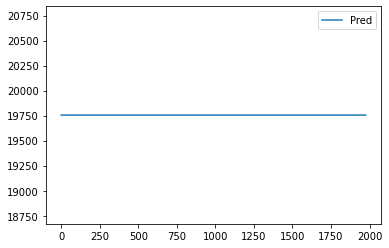

In [99]:
plt.plot(pred)
#plt.plot(y_train)
plt.legend(['Pred','y_train'])

In [102]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(X))
new_df.columns = X.columns
new_df.index = X.index
new_df.head()

,Subjectivity,Polarity,Negative,Neutral,Positive,Close
publish_date,,,,,,
2001-01-02,0.143605,0.344859,0.218259,0.831698,0.117427,0.031422
2001-01-03,0.127439,0.257702,0.282960,0.786122,0.145178,0.032334
2001-01-04,0.298778,0.334635,0.178811,0.835366,0.140190,0.033559
2001-01-05,0.555970,0.674727,0.265337,0.741897,0.230720,0.035073
2001-01-08,0.241840,0.248037,0.223417,0.818833,0.134819,0.033672


In [144]:
x = new_df.drop('Close', axis=1)
y =new_df['Close']

In [145]:
x_train = x[0:3000]
x_train.tail()

,Subjectivity,Polarity,Negative,Neutral,Positive
publish_date,,,,,
2013-02-11,0.360424,0.321428,0.268483,0.798663,0.135078
2013-02-12,0.281539,0.251818,0.298177,0.797711,0.114955
2013-02-13,0.292768,0.300503,0.285694,0.796177,0.126617
2013-02-14,0.325596,0.327228,0.264532,0.788386,0.154869
2013-02-15,0.334611,0.317518,0.302440,0.788210,0.127487


In [146]:
x_test = x[3000:]
y_train = y[:3000]
y_test = y[3000:]

In [108]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [109]:
pred = rfr.predict(x_test)
pred = pd.DataFrame(pred,index = x_test.index,columns=['Close'])

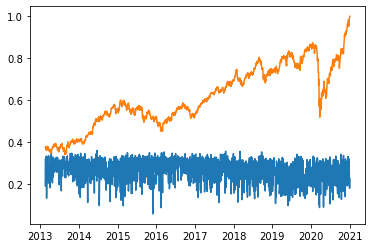

In [110]:
plt.plot(pred)
plt.plot(y_test)